In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


```py
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = None

# Clean data
df = None


def draw_line_plot():
    # Draw line plot





    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
```

In [221]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('./fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [222]:
# Clean data
top_views = df['value'].quantile(0.975)
bottom_views = df['value'].quantile(0.025)

df = df[(df['value'] <= top_views) & (df['value'] >= bottom_views)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

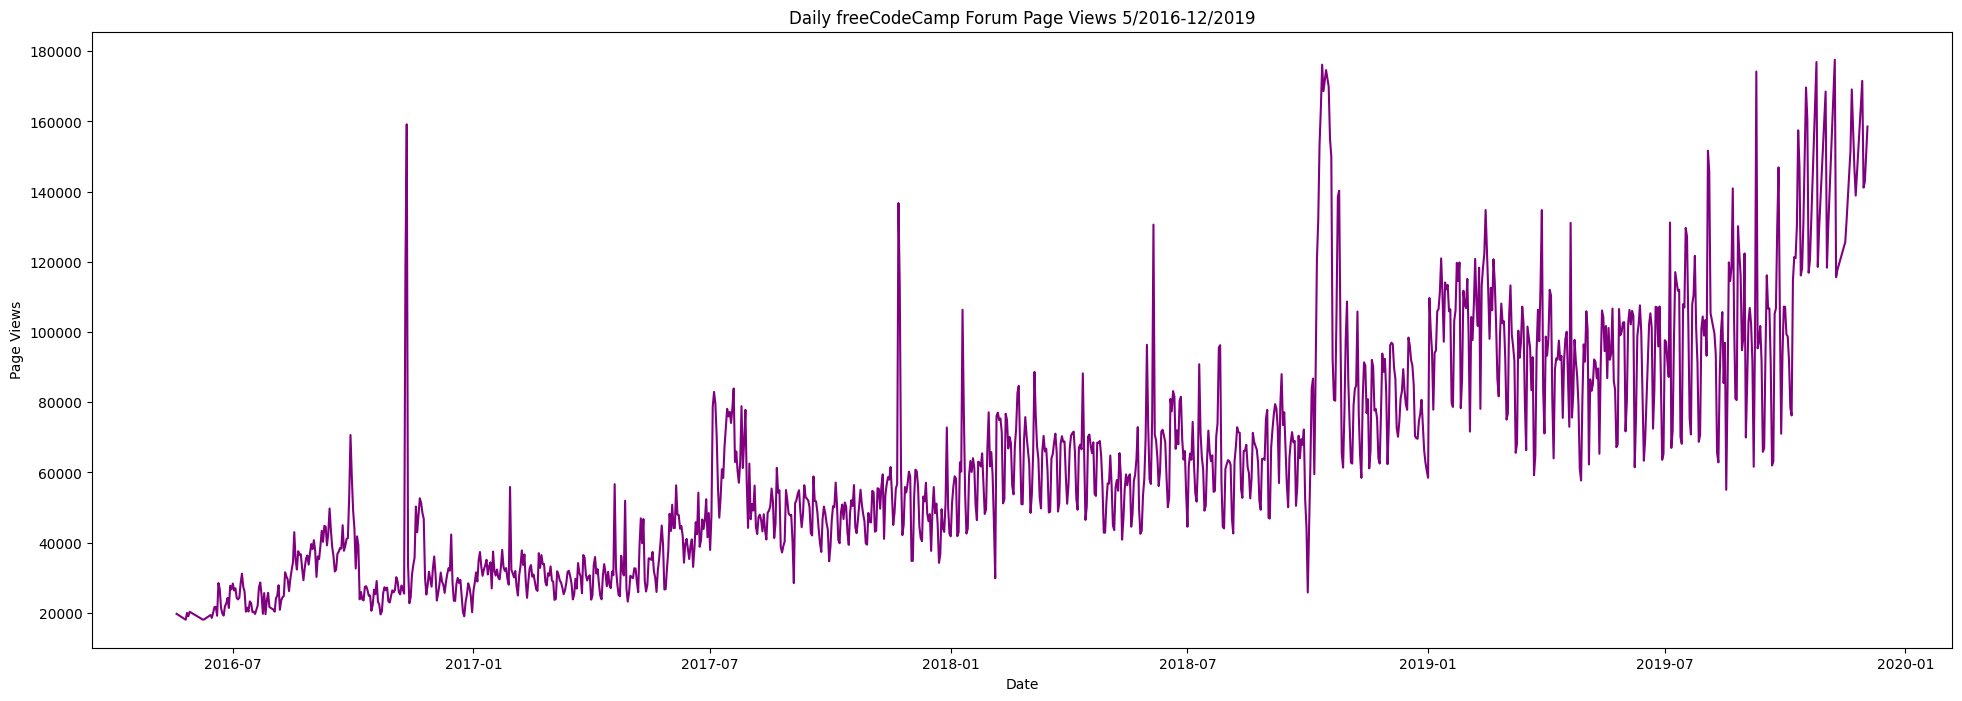

In [223]:
fig, ax = plt.subplots(figsize=(24, 8))
ax.plot(df, color="purple")
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


In [224]:
fig.savefig('plot1.png')

In [225]:
yearly = df.groupby(pd.Grouper(freq='YE')).sum()
yearly

,value
date,
2016-12-31,6320303
2017-12-31,15736295
2018-12-31,25184051
2019-12-31,30827814


In [226]:
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
df_bar

,value,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5
...,...,...,...
2019-11-24,138875,2019,11
2019-11-29,171584,2019,11
2019-11-30,141161,2019,11


In [227]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar['month_name'] = df_bar['month'].apply(lambda x: month_names[x - 1])
df_bar

,value,year,month,month_name
date,,,,
2016-05-19,19736,2016,5,May
2016-05-26,18060,2016,5,May
2016-05-27,19997,2016,5,May
2016-05-28,19044,2016,5,May
2016-05-29,20325,2016,5,May
...,...,...,...,...
2019-11-24,138875,2019,11,November
2019-11-29,171584,2019,11,November
2019-11-30,141161,2019,11,November


In [228]:
df_average = df_bar.groupby(['year', 'month', 'month_name']).mean().round(decimals=0)
df_average
# nur zur info ob pivot zahlen richtig sind !!!

value
year month month_name          
2016 5     May          19432.0
     6     June         21875.0
     7     July         24110.0
     8     August       31049.0
     9     September    41477.0
     10    October      27398.0
     11    November     40449.0
     12    December     27832.0
2017 1     January      32785.0
     2     February     31113.0
     3     March        29369.0
     4     April        30879.0
     5     May          34244.0
     6     June         43578.0
     7     July         65807.0
     8     August       47712.0
     9     September    47377.0
     10    October      47439.0
     11    November     57702.0
     12    December     48421.0
2018 1     January      58580.0
     2     February     65679.0
     3     March        62694.0
     4     April        62351.0
     5     May          56563.0
     6     June         70117.0
     7     July         63591.0
     8     August       62832.0
     9     September    65942.0
     10    October     111378.0
     11    November     78688.0
     12    December     80047.0
2019 1     January     102057.0
     2     February    105968.0
     3     March        91214.0
     4     April        89368.0
     5     May          91440.0
     6     June         90436.0
     7     July         97237.0
     8     August      102717.0
     9     September    97269.0
     10    October     122802.0
     11    November    143166.0
     12    December    150734.0

In [229]:
df_pivot = df_bar.pivot_table(index='year', columns='month_name', values='value', aggfunc='mean')
df_pivot

month_name,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


In [230]:
df_pivot = df_pivot.reindex(columns=month_names)
df_pivot

month_name,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


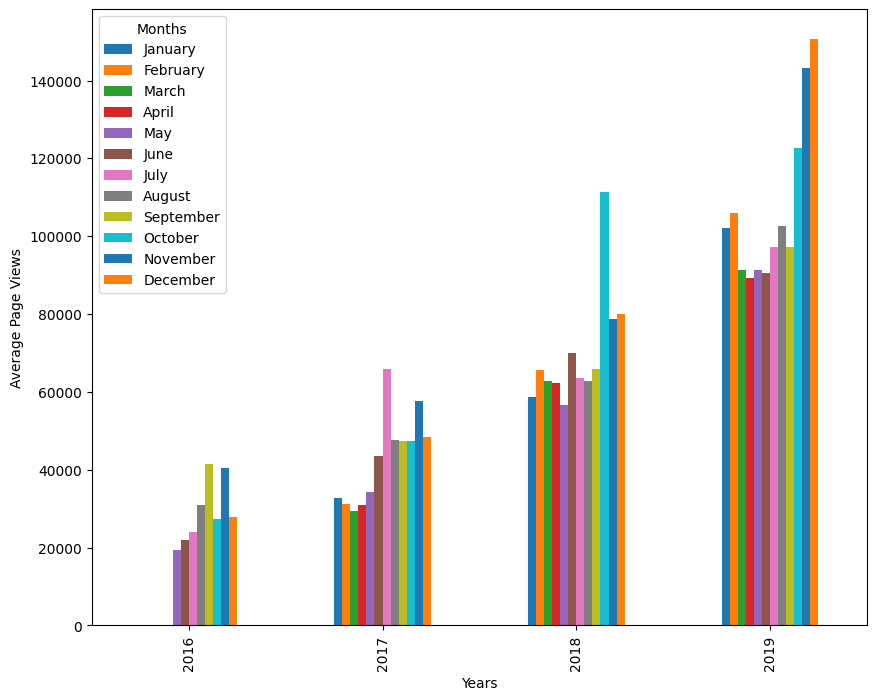

In [231]:
df_pivot.plot(kind='bar', stacked=False, figsize=(10, 8))
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title='Months')
plt.ticklabel_format(style='plain', axis='y')
fig = plt.gcf()


In [232]:
fig.savefig('plot2.png')

In [237]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [238]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
marker_style = {'marker': 'd', 'markerfacecolor': 'k'}

In [239]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

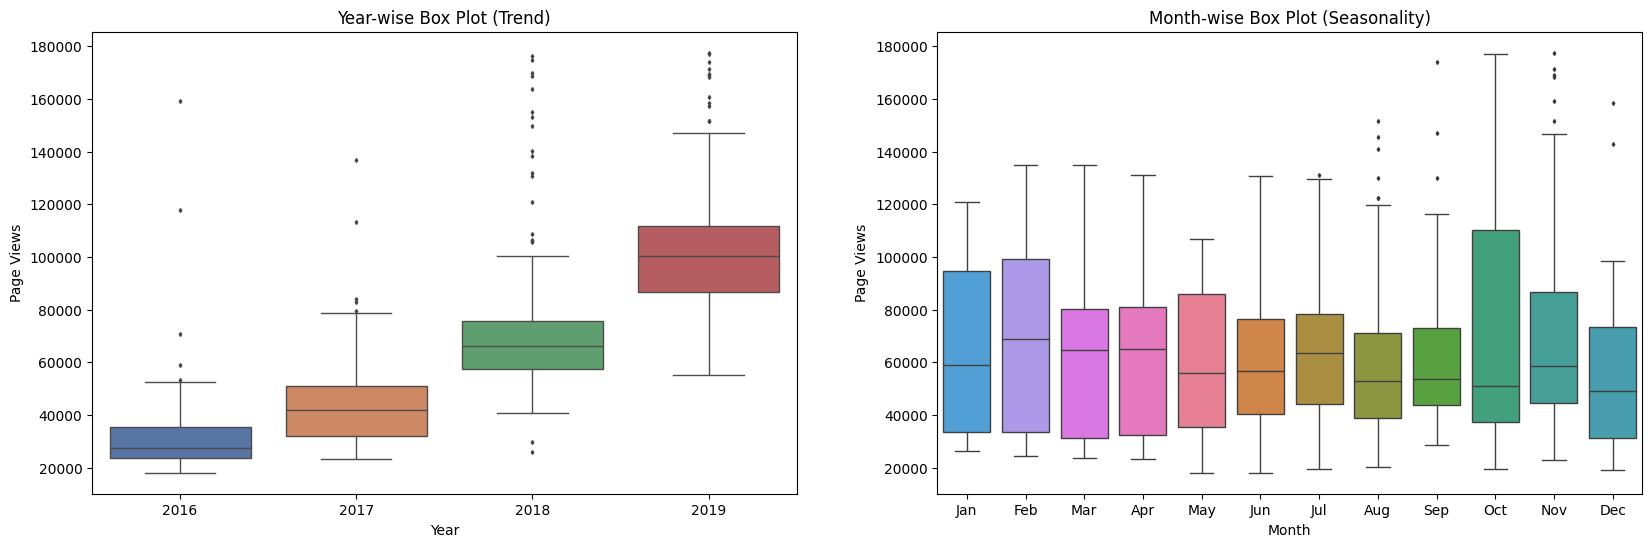

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
plt.subplot(1,2,1)
sns.boxplot(data=df_box, x='year', y='value', ax=ax[0], hue='year', palette='deep', legend=False, flierprops=marker_style, fliersize=2)
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.title('Year-wise Box Plot (Trend)')

plt.subplot(1,2,2)
sns.boxplot(data=df_box, x='month', y='value', ax=ax[1], order=month_order, hue='month', legend=False, flierprops=marker_style, fliersize=2)
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.title('Month-wise Box Plot (Seasonality)')



In [ ]:
fig.savefig('plot3.png')